<a href="https://colab.research.google.com/github/Harish03101998/Airline-customer-segmentation/blob/main/Airline_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing pandas

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('flight.csv')

In [5]:
data.shape

(62988, 23)

In [6]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Finding null values and fill the null values

In [8]:
data.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [10]:
data['WORK_CITY'].notnull() & data['WORK_PROVINCE'].notnull()

0         True
1        False
2         True
3         True
4         True
         ...  
62983     True
62984     True
62985     True
62986     True
62987     True
Length: 62988, dtype: bool

In [13]:
data = data[data['WORK_CITY'].notnull() & data['WORK_PROVINCE'].notnull()]

In [14]:
data.shape

(59240, 23)

In [ ]:
#null values are removed

In [15]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           1
AGE                  323
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             528
SUM_YR_2             134
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [16]:
data['AGE'].unique()

array([ 31.,  40.,  64.,  48.,  46.,  50.,  43.,  34.,  47.,  58.,  45.,
        63.,  54.,  41.,  49.,  nan,  69.,  39.,  62.,  55.,  53.,  37.,
        51.,  59.,  76.,  38.,  42.,  60.,  52.,  44.,  30.,  33.,  28.,
        67.,  57.,  35.,  70.,  66.,  56.,  61.,  36.,  78.,  32.,  74.,
        68.,  65.,  27.,  72.,  71.,  79.,  25.,  29.,  21.,  26.,  18.,
        19.,  73.,  77.,  15.,  16.,  75.,  24.,  12.,  23.,  14.,  20.,
        22.,  89.,  80.,  81.,  83.,  82.,  84.,  13.,  17.,  86., 110.,
         7.,  85.,   6.,  92.,  88.,   9.,  91.])

In [17]:
data['AGE'] = data['AGE'].fillna(data['AGE'].median())

In [18]:
data['AGE'].unique()

array([ 31.,  40.,  64.,  48.,  46.,  50.,  43.,  34.,  47.,  58.,  45.,
        63.,  54.,  41.,  49.,  69.,  39.,  62.,  55.,  53.,  37.,  51.,
        59.,  76.,  38.,  42.,  60.,  52.,  44.,  30.,  33.,  28.,  67.,
        57.,  35.,  70.,  66.,  56.,  61.,  36.,  78.,  32.,  74.,  68.,
        65.,  27.,  72.,  71.,  79.,  25.,  29.,  21.,  26.,  18.,  19.,
        73.,  77.,  15.,  16.,  75.,  24.,  12.,  23.,  14.,  20.,  22.,
        89.,  80.,  81.,  83.,  82.,  84.,  13.,  17.,  86., 110.,   7.,
        85.,   6.,  92.,  88.,   9.,  91.])

In [19]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           1
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             528
SUM_YR_2             134
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [20]:
data['SUM_YR_1'].interpolate(method = 'linear',inplace = True)

In [22]:
data.isnull().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           1
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2             134
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

In [23]:
data['SUM_YR_2'].interpolate(method = 'linear',inplace = True)
#Interpolate is used to fill null values

In [24]:
data.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               3
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         1
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [25]:
data.nunique().sort_values()

LOAD_TIME                1
GENDER                   2
FFP_TIER                 3
EXCHANGE_COUNT          27
AGE                     83
Point_NotFlight         99
WORK_COUNTRY           106
FLIGHT_COUNT           151
MAX_INTERVAL           706
LAST_TO_END            731
LAST_FLIGHT_DATE       731
WORK_PROVINCE         1139
WORK_CITY             2976
FFP_DATE              3063
FIRST_FLIGHT_DATE     3400
AVG_INTERVAL         10552
SUM_YR_1             15624
SUM_YR_2             16461
BP_SUM               22793
Points_Sum           24382
SEG_KM_SUM           28215
avg_discount         51115
MEMBER_NO            59240
dtype: int64

In [26]:
data['GENDER'].value_counts()

Male      45144
Female    14093
Name: GENDER, dtype: int64

In [27]:
data['WORK_COUNTRY'].unique()

array(['CN', 'US', 'FR', 'AN', 'JP', 'HK', 'MY', 'NL', 'AU', 'CA', 'KR',
       'PK', 'SG', 'BR', 'PE', 'HN', 'PH', 'GN', 'FL', 'MO', 'TW', 'VN',
       'DE', 'IL', 'CH', 'ID', 'KH', 'VT', 'TH', 'EC', 'NG', 'BI', 'BE',
       'GL', 'NZ', 'MX', 'FA', 'NI', 'KO', 'CC', 'UV', 'MN', 'UK', 'AS',
       'IT', 'AE', 'IN', 'NO', 'MS', 'UZ', 'NE', 'AT', 'HU', 'EG', '中',
       'AA', 'ES', 'MZ', 'SW', 'PS', 'KE', 'KZ', 'SE', 'SN', 'BB', 'UA',
       'MA', 'YE', 'GE', 'SI', 'CY', 'KA', 'RO', 'DK', 'AB', 'CD', 'UY',
       'CM', 'TK', 'IR', 'AR', 'BN', 'MV', 'PN', '北', 'SU', 'RU', '沈',
       'GU', 'GB', 'PP', nan, '芬', 'FO', 'IE', 'PR', 'AZ', 'GH', 'ZA',
       'IA', 'cn', 'TR', 'LA', 'BG', 'CL', 'CR', 'SA'], dtype=object)

In [28]:
data['WORK_COUNTRY'].value_counts()

CN    55895
JP      720
KR      720
US      489
HK      373
      ...  
BI        1
AB        1
CD        1
EC        1
EG        1
Name: WORK_COUNTRY, Length: 106, dtype: int64

In [29]:
list1 = ['CN','KR','US','HK','JP']

In [30]:
data = data.loc[data.WORK_COUNTRY.isin(list1)]

In [31]:
data['WORK_COUNTRY'].value_counts()

CN    55895
JP      720
KR      720
US      489
HK      373
Name: WORK_COUNTRY, dtype: int64

In [32]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15


In [33]:
data.drop(columns = ['MEMBER_NO','FFP_DATE','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','WORK_CITY','LOAD_TIME'],inplace = True)
#Dropped columns which are not required

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58197 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           58195 non-null  object 
 1   FFP_TIER         58197 non-null  int64  
 2   WORK_PROVINCE    58197 non-null  object 
 3   WORK_COUNTRY     58197 non-null  object 
 4   AGE              58197 non-null  float64
 5   FLIGHT_COUNT     58197 non-null  int64  
 6   BP_SUM           58197 non-null  int64  
 7   SUM_YR_1         58197 non-null  float64
 8   SUM_YR_2         58197 non-null  float64
 9   SEG_KM_SUM       58197 non-null  int64  
 10  LAST_TO_END      58197 non-null  int64  
 11  AVG_INTERVAL     58197 non-null  float64
 12  MAX_INTERVAL     58197 non-null  int64  
 13  EXCHANGE_COUNT   58197 non-null  int64  
 14  avg_discount     58197 non-null  float64
 15  Points_Sum       58197 non-null  int64  
 16  Point_NotFlight  58197 non-null  int64  
dtypes: float64(5

In [35]:
data = data.reset_index(drop = True)

In [38]:
data.isnull().sum()

GENDER             2
FFP_TIER           0
WORK_PROVINCE      0
WORK_COUNTRY       0
AGE                0
FLIGHT_COUNT       0
BP_SUM             0
SUM_YR_1           0
SUM_YR_2           0
SEG_KM_SUM         0
LAST_TO_END        0
AVG_INTERVAL       0
MAX_INTERVAL       0
EXCHANGE_COUNT     0
avg_discount       0
Points_Sum         0
Point_NotFlight    0
dtype: int64

In [39]:
data['WORK_COUNTRY'].nunique()

5

In [42]:
data = pd.get_dummies(data, columns = ['WORK_COUNTRY'])
# Dummies convert categorical variables into dummy or indicator variables

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58197 entries, 0 to 58196
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           58195 non-null  object 
 1   FFP_TIER         58197 non-null  int64  
 2   WORK_PROVINCE    58197 non-null  object 
 3   AGE              58197 non-null  float64
 4   FLIGHT_COUNT     58197 non-null  int64  
 5   BP_SUM           58197 non-null  int64  
 6   SUM_YR_1         58197 non-null  float64
 7   SUM_YR_2         58197 non-null  float64
 8   SEG_KM_SUM       58197 non-null  int64  
 9   LAST_TO_END      58197 non-null  int64  
 10  AVG_INTERVAL     58197 non-null  float64
 11  MAX_INTERVAL     58197 non-null  int64  
 12  EXCHANGE_COUNT   58197 non-null  int64  
 13  avg_discount     58197 non-null  float64
 14  Points_Sum       58197 non-null  int64  
 15  Point_NotFlight  58197 non-null  int64  
 16  WORK_COUNTRY_CN  58197 non-null  uint8  
 17  WORK_COUNTRY

In [45]:
data['WORK_PROVINCE'].nunique()

744

In [46]:
data = pd.get_dummies(data, columns = ['WORK_PROVINCE'])

In [47]:
data.shape

(58197, 764)

In [48]:
data.head()

,GENDER,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,...,WORK_PROVINCE_zhongqing,WORK_PROVINCE_zhongqingshi,WORK_PROVINCE_zhuhai,WORK_PROVINCE_——,WORK_PROVINCE_,WORK_PROVINCE_,WORK_PROVINCE_。,WORK_PROVINCE_shanxian,WORK_PROVINCE_－,WORK_PROVINCE_．
0,Male,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,...,0,0,0,0,0,0,0,0,0,0
1,Male,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,...,0,0,0,0,0,0,0,0,0,0
2,Male,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,...,0,0,0,0,0,0,0,0,0,0
3,Male,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,...,0,0,0,0,0,0,0,0,0,0
4,Male,6,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data = pd.get_dummies(data, columns = ['GENDER'])

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58197 entries, 0 to 58196
Columns: 765 entries, FFP_TIER to GENDER_Male
dtypes: float64(5), int64(9), uint8(751)
memory usage: 47.9 MB


In [52]:
data.dtypes

FFP_TIER                     int64
AGE                        float64
FLIGHT_COUNT                 int64
BP_SUM                       int64
SUM_YR_1                   float64
                            ...   
WORK_PROVINCE_shanxian      uint8
WORK_PROVINCE_－              uint8
WORK_PROVINCE_．              uint8
GENDER_Female                uint8
GENDER_Male                  uint8
Length: 765, dtype: object

In [53]:
data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58197 entries, 0 to 58196
Data columns (total 765 columns):
 #    Column                                       Non-Null Count  Dtype  
---   ------                                       --------------  -----  
 0    FFP_TIER                                     58197 non-null  int64  
 1    AGE                                          58197 non-null  float64
 2    FLIGHT_COUNT                                 58197 non-null  int64  
 3    BP_SUM                                       58197 non-null  int64  
 4    SUM_YR_1                                     58197 non-null  float64
 5    SUM_YR_2                                     58197 non-null  float64
 6    SEG_KM_SUM                                   58197 non-null  int64  
 7    LAST_TO_END                                  58197 non-null  int64  
 8    AVG_INTERVAL                                 58197 non-null  float64
 9    MAX_INTERVAL                                 58197 non-null

Preprocessing the data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
SS = StandardScaler()

In [58]:
data = SS.fit_transform (data)

In [57]:
from sklearn.cluster import KMeans

In [63]:
km = KMeans()

In [64]:
y_km = km.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
y_km[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [66]:
inertias = []

In [68]:
for k in range (1,11):
  km = KMeans(n_clusters = k, random_state = 10)
  km.fit(data)
  inertias.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [70]:
inertias

[44520705.000000104,
 44461580.38126862,
 44218886.375277765,
 44176557.150387466,
 44112438.616218284,
 44004839.97973259,
 43949059.64926295,
 43933188.04880229,
 43829314.57810755,
 43767098.13622257]

Visualize the data

In [71]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'obj')

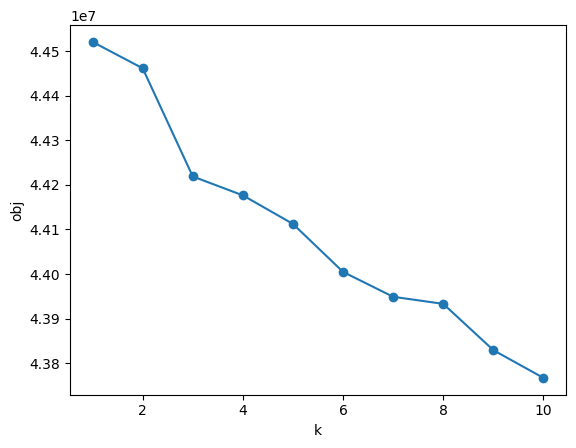

In [72]:
plt.plot(range(1,11), inertias, marker = 'o')
plt.xlabel('k')
plt.ylabel('obj')

In [ ]:
#Above graph shows that data don't have good clustering so elbow not formed

In [74]:
from sklearn.metrics import silhouette_score

In [ ]:
# Silhouette score is the measure of how similar a data point is within the cluster compared to other clusters

In [82]:
silhouette_scores = []
inertias = []

In [84]:
for k in range(2,11):
  km = KMeans(n_clusters = k, random_state = 10)
  y_km = km.fit_predict(data)
  inertias.append(km.inertia_)
  silhouette_scores.append(silhouette_score(data, y_km))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [85]:
silhouette_scores

[-0.0351414814794318,
 0.03636884462874338,
 -0.096516735715784,
 0.16624001159555013,
 -0.004781911498033596,
 -0.015419352089696735,
 -0.09725955459095037,
 -0.0023944834405037457,
 -0.0016887580245448094]

In [ ]:
# Best value : 0.16624
# Worst value: -0.097